In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [84]:
df = pd.read_csv('Data/world_cups.csv')
dfm = pd.read_csv('Data/world_cup_matches.csv')
#Cruzar las tablas
df = df.merge(dfm, left_on='Year', right_on='Year', how='left')
df.head(10)

,Year,Host Country,Winner,Runners-Up,Third,Fourth,Goals Scored,Qualified Teams,Matches Played,ID,Date,Stage,Home Team,Home Goals,Away Goals,Away Team,Winning Team,Losing Team,Win Conditions,Host Team
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70.0,13,18,1.0,1930/7/13,Group stage,France,4.0,1.0,Mexico,France,Mexico,NaN,False
1,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70.0,13,18,2.0,1930/7/13,Group stage,United States,3.0,0.0,Belgium,United States,Belgium,NaN,False
2,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70.0,13,18,3.0,1930/7/14,Group stage,Yugoslavia,2.0,1.0,Brazil,Yugoslavia,Brazil,NaN,False
3,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70.0,13,18,4.0,1930/7/14,Group stage,Romania,3.0,1.0,Peru,Romania,Peru,NaN,False
4,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70.0,13,18,5.0,1930/7/15,Group stage,Argentina,1.0,0.0,France,Argentina,France,NaN,False
5,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70.0,13,18,6.0,1930/7/16,Group stage,Chile,3.0,0.0,Mexico,Chile,Mexico,NaN,False
6,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70.0,13,18,7.0,1930/7/17,Group stage,Yugoslavia,4.0,0.0,Bolivia,Yugoslavia,Bolivia,NaN,False
7,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70.0,13,18,8.0,1930/7/17,Group stage,United States,3.0,0.0,Paraguay,United States,Paraguay,NaN,False
8,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70.0,13,18,9.0,1930/7/18,Group stage,Uruguay,1.0,0.0,Peru,Uruguay,Peru,NaN,True
9,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70.0,13,18,10.0,1930/7/19,Group stage,Chile,1.0,0.0,France,Chile,France,NaN,False


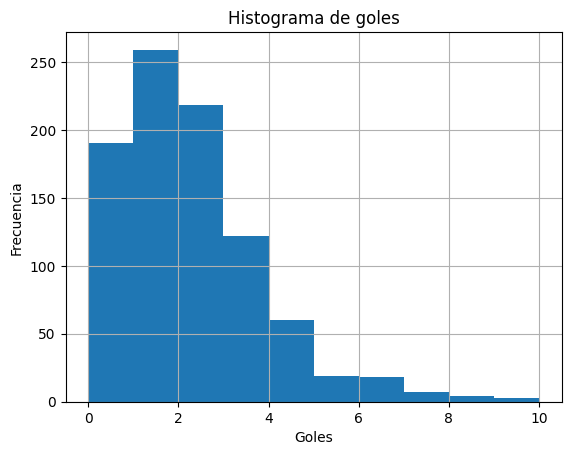

In [85]:
#Histograma de goles de local
df['Home Goals'].hist(bins=10)
plt.xlabel('Goles')
plt.ylabel('Frecuencia')
plt.title('Histograma de goles')
plt.show()



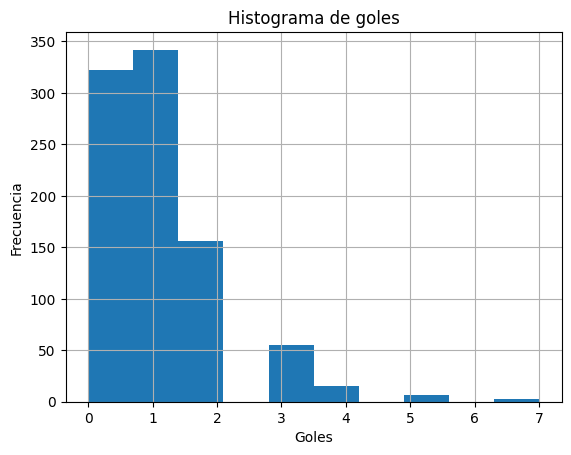

In [86]:
#Histograma de goles de visitante
df['Away Goals'].hist(bins=10)
plt.xlabel('Goles')
plt.ylabel('Frecuencia')
plt.title('Histograma de goles')
plt.show()

<Axes: xlabel='Winning Team'>

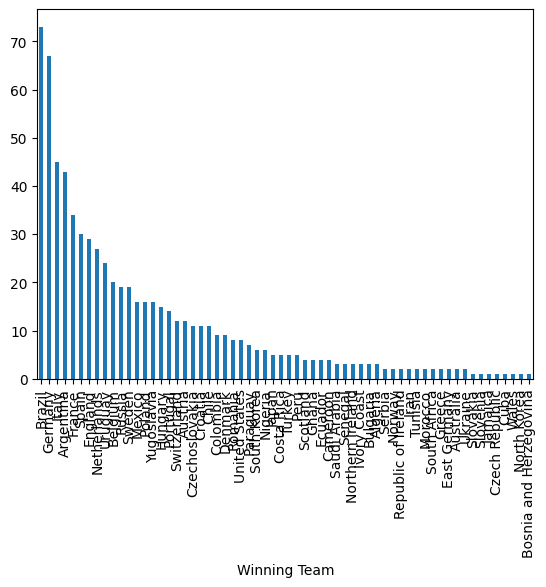

In [87]:
#Diagrama de barras de ganadores en partidos de mundiales
df['Winning Team'].value_counts().plot(kind='bar')

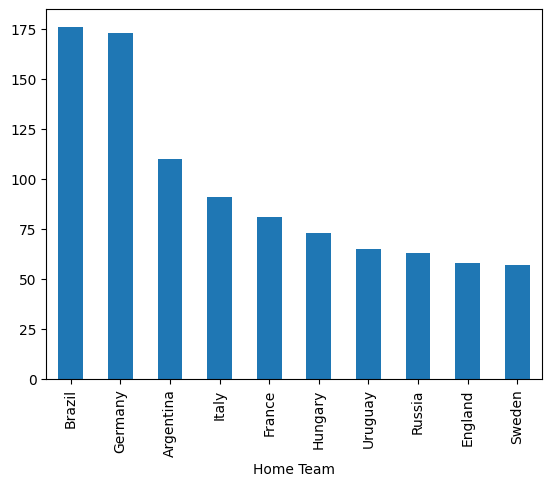

In [88]:
#grafica de los goles por equipo
df.groupby('Home Team')['Home Goals'].sum().sort_values(ascending=False).head(10).plot.bar()
plt.show()

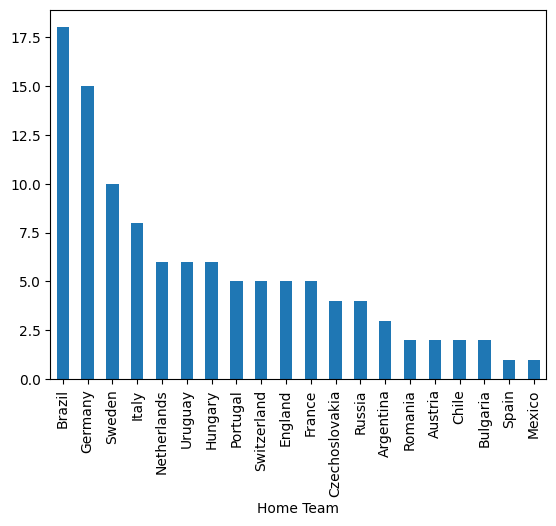

In [89]:
#grafica de los goles en cuartos de final por equipo
df[df['Stage']=='Quarter-finals'].groupby('Home Team')['Home Goals'].sum().sort_values(ascending=False).head(20).plot.bar()
plt.show()

<Axes: xlabel='Winner'>

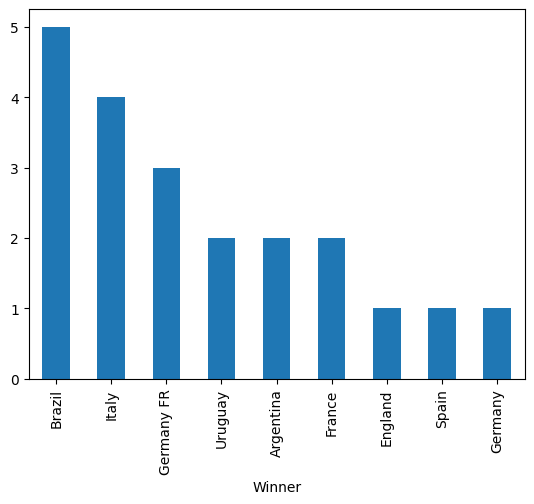

In [90]:
#Diagrama de barras de ganadores de mundiales
df = pd.read_csv('Data/world_cups.csv')
df['Winner'].value_counts().plot(kind='bar')

<Axes: xlabel='Runners-Up'>

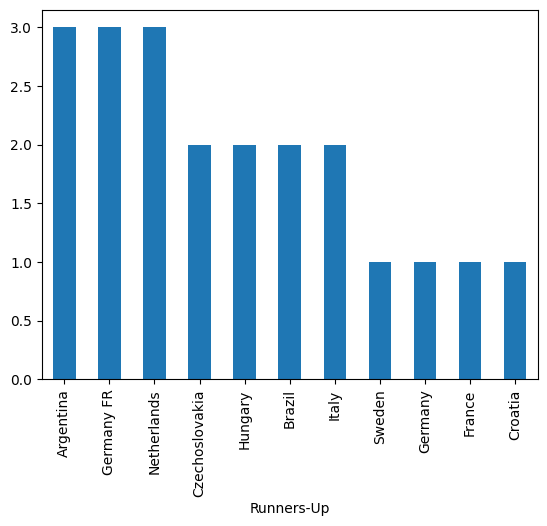

In [91]:
#Diagrama de barras de subcampeones de mundiales
df['Runners-Up'].value_counts().plot(kind='bar')

<Axes: xlabel='Third'>

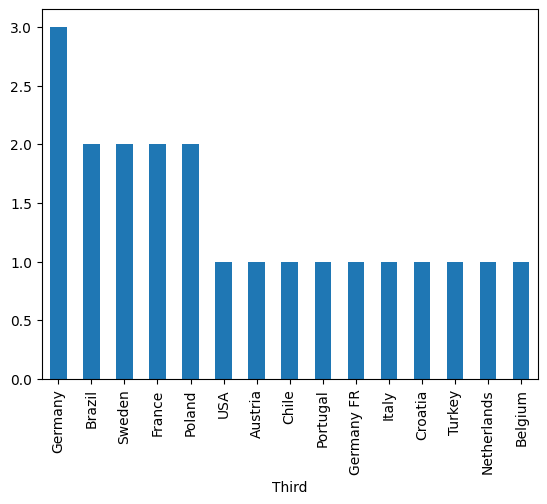

In [92]:
#Diagrama de barras de terceros lugares de mundiales
df['Third'].value_counts().plot(kind='bar')

<Axes: xlabel='Fourth'>

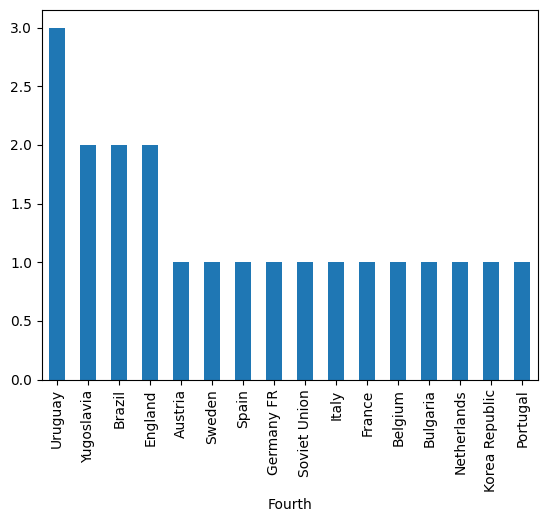

In [93]:
#Diagrama de barras de cuartos lugares de mundiales
df['Fourth'].value_counts().plot(kind='bar')

In [94]:
#Coincidimos en que el cuarto lugar no afecta tanto, puesto que esos países no se ven involucrados en su mayopría como campeones o subcampeones
#Por lo que se puede eliminar esa columna
#También se podrían eliminar los países que menos partidos han ganado en mundiales, puesto que no se ven involucrados en las etapas finales
#De momento se eliminarán los países que menos partidos han ganado en mundiales
#Los goles son un poco ambiguos, puesto que subir de los 2 goles es muy poco probable, por lo que se eliminarán los goles
#Los equipos visitantes suelen estar ahí en vista de la clasificación del futbol de peor contra mejor
#Por lo que se ve que hacen menos goles, no tienen mucha relevancia
#Sin embargo, no eliminamos goles porque se ve que los equipos que más goles anotan, suelen ganar más mundiales, tales cómo Brasil